In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
from numpy import sin, pi
import matplotlib.pyplot as plt
from scipy.signal import find_peaks_cwt
from pyampd.ampd import find_peaks, find_peaks_original, find_peaks_adaptive

## Create fake signal

In [5]:
def fake_timeseries(tmax=30, seed=None):
    """Generate fake data for testing peak detection algorithms"""
    np.random.seed(seed)
    fs, f1, f2, f3, a, b, c, d = 20, 1, 2, 0.1, 1, 0.6, 1, 1.
    N = int(tmax*fs)
    t = np.linspace(0, tmax, N)
    x = a*sin(2*pi*f1*t) + b*sin(2*pi*f2*t) + c*sin(2*pi*f3*t) + d*np.random.rand(N)
    return t, x

## Compare peak detect methods

In [15]:
methods = [
    ('original_ampd', find_peaks_original),
    ('ampd', find_peaks),
    ('ampd_fast', lambda x: find_peaks(x, scale=50)),
    ('ass_ampd', find_peaks_adaptive),
    ('cwt', lambda x: find_peaks_cwt(x, widths=range(1,50))),
]
styles = ['rs', 'go', 'bx', 'cs', 'mo']

In [16]:
t, x = fake_timeseries(tmax=30, seed=0)

In [17]:
all_pks = [method(x) for name, method in methods]

Text(0, 0.5, 'signal')

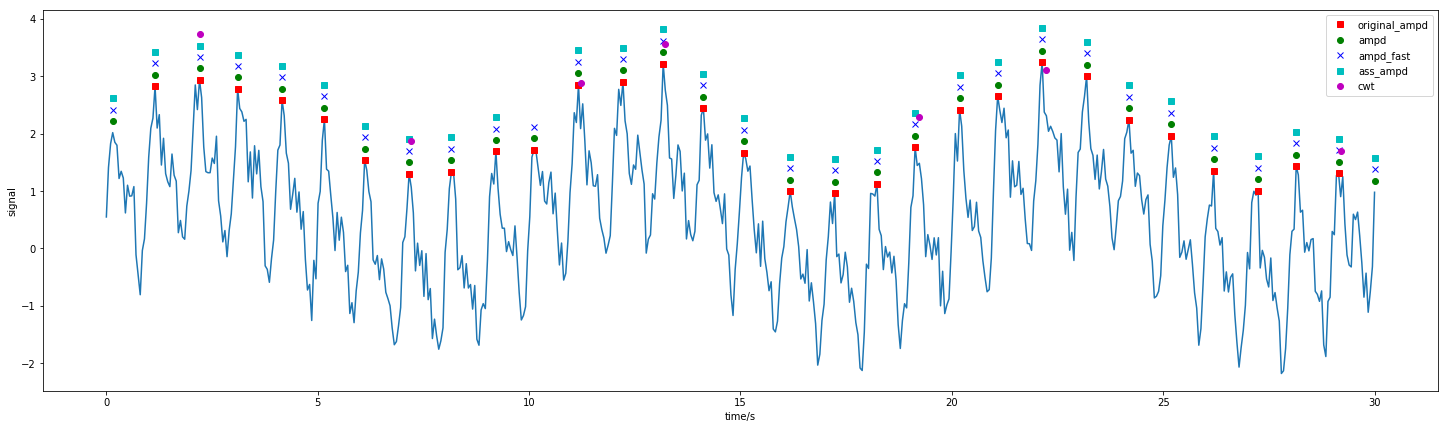

In [18]:
plt.figure(figsize=(25, 7))
plt.plot(t, x, '-')
for idx in range(len(methods)):
    pks = all_pks[idx]
    offset = idx * 0.2
    style = styles[idx]
    name = methods[idx][0]
    plt.plot(t[pks], offset + x[pks], style, label=name)
plt.legend()
plt.xlabel('time/s')
plt.ylabel('signal')

## Compare timing

In [23]:
t, x = fake_timeseries(tmax=300, seed=0)
print('{} samples over {} s'.format(len(x), t[-1]))

6000 samples over 300.0 s


In [24]:
for name, method in methods:
    print('timing "{}":'.format(name.upper()))
    %time pks = method(x)
    print()

timing "ORIGINAL_AMPD":
CPU times: user 144 ms, sys: 25.6 ms, total: 169 ms
Wall time: 44.4 ms

timing "AMPD":
CPU times: user 175 ms, sys: 22.5 ms, total: 197 ms
Wall time: 49.7 ms

timing "AMPD_FAST":
CPU times: user 7.39 ms, sys: 1.76 ms, total: 9.15 ms
Wall time: 2.29 ms

timing "ASS_AMPD":
CPU times: user 711 ms, sys: 200 ms, total: 911 ms
Wall time: 559 ms

timing "CWT":
CPU times: user 279 ms, sys: 2.05 ms, total: 281 ms
Wall time: 281 ms



## Inspect LSM

In [25]:
t, x = fake_timeseries(tmax=30, seed=0)

In [27]:
pks, LSM, G, l = find_peaks(x, debug=True)

Text(0, 0.5, 'signal')

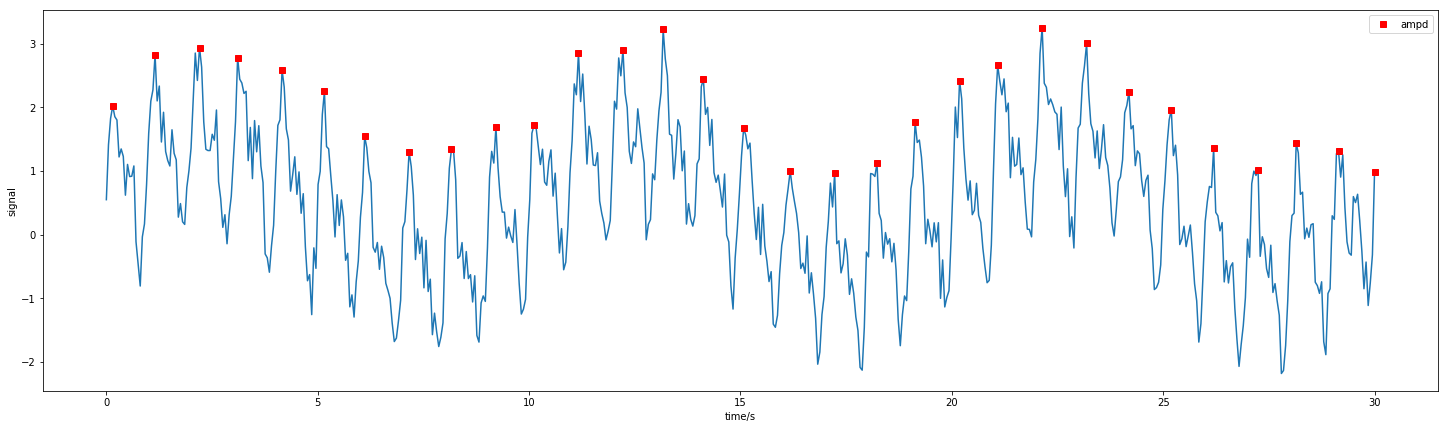

In [28]:
plt.figure(figsize=(25, 7))
plt.plot(t, x, '-')
plt.plot(t[pks], x[pks], 'rs', label='ampd')
plt.legend()
plt.xlabel('time/s')
plt.ylabel('signal')

Text(0.5, 0, '# local peaks')

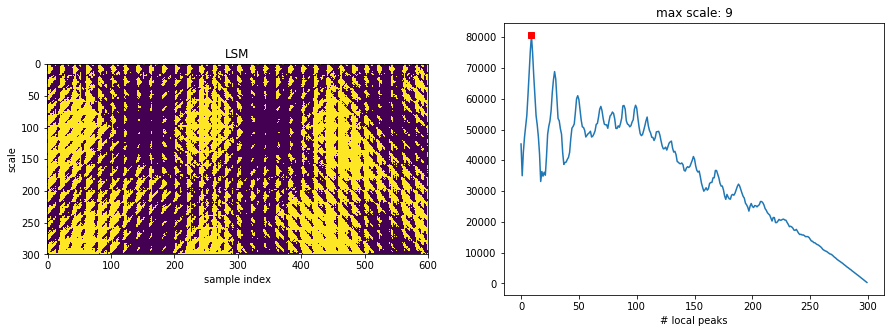

In [29]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(15, 5))
ax = ax0
ax.imshow(LSM)
ax.set_title('LSM')
ax.set_xlabel('sample index')
ax.set_ylabel('scale')
ax = ax1
ax.plot(G)
ax.plot([l], G[l], 'rs')
ax.set_title('max scale: {}'.format(l))
ax.set_xlabel('scale')
ax.set_xlabel('# local peaks')